# Deepir implementation
### The code is based on [deepir](https://github.com/TaddyLab/deepir) with slight modification
### Data is based on [Kaggle Yelp Review](https://www.kaggle.com/c/yelp-recruiting/data)

In [1]:
import re
import json
import pandas as pd

## Preprocessing data 

In [2]:
# all non alphanumeric
contractions = re.compile(r"'|-")
symbols = re.compile(r'(\W+)', re.U)
numeric = re.compile(r'(?<=\s)(\d+|\w\d+|\d+\w)(?=\s)', re.I)
swrd = re.compile(r'(?<=\s)(,|"|\(|\)|to|a|as|the|an|and|or|for|are|is)(?=\s)', re.I)
suffix = re.compile(r'(?<=\w)(s|ings*|ly|(?<=e)[sd]+)(?=\s)')
seps = re.compile(r'\s+')

In [3]:
# cleaner (order matters)
def clean(text): 
    text = u' ' +  text.lower() + u' '
    text = contractions.sub('', text)
    text = symbols.sub(r' \1 ', text)
    text = numeric.sub('000', text)
    text = swrd.sub(' ', text)
    #text = suffix.sub('', text)
    text = seps.sub(' ', text)
    return text

In [4]:
def preprocess(f_dir):
    data = []
    for line in open(f_dir,'r'):
        d = json.loads(line)
        txt = clean(d['text'])
        data.append([d['stars'],txt])
    return pd.DataFrame(data=data,columns=['stars','txt'])

In [5]:
%time train_df = preprocess('data/yelp_training_set/yelp_training_set_review.json')

CPU times: user 1min 41s, sys: 388 ms, total: 1min 41s
Wall time: 1min 41s


In [6]:
train_df

,stars,txt
0,5,my wife took me here on my birthday breakfast...
1,5,i have no idea why some people give bad revie...
2,4,love gyro plate . rice so good i also dig the...
3,5,rosie dakota i love chaparral dog park !!! it...
4,5,general manager scott petello good egg !!! no...
5,4,quiessence simply put beautiful . full window...
6,5,drop what youre doing drive here . after i at...
7,4,luckily i didnt have travel far make my conne...
8,4,definitely come happy hour ! prices amazing s...
9,5,nobuo shows his unique talents with everythin...


In [7]:
%time test_df = preprocess('data/yelp_test_set/yelp_test_set_review.json')

CPU times: user 9.2 s, sys: 8 ms, total: 9.21 s
Wall time: 9.2 s


In [8]:
test_df

,stars,txt
0,5,nice place big patio . now offering live sket...
1,5,friendly staff . make sure you order gyro pla...
2,5,love love love this place breakfast . they al...
3,1,disgusting sandwich . i should have known bet...
4,4,always fan of cafe zupas their very friendly ...
5,5,when i first get there i check lot see deals ...
6,4,great salsa especially if you mix red green t...
7,4,ajs unsweeted tea selection amazing ! with so...
8,4,i stop in here from time time with friend who...
9,2,ugh . i want love this place like some of my ...


## Re-write of deepir

In [9]:
import numpy as np
from gensim.models import Word2Vec
from gensim.models import Phrases
from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

Couldn't import dot_parser, loading of dot files will not be possible.


In [10]:
# define a review generator
alteos = re.compile(r'( [!\?] )')

def revsplit(l):
    l = alteos.sub(r' \1 . ', l).rstrip("( \. )*\n")
    return [s.split() for s in l.split(" . ")]

def YelpReviews(df):
    data = []
    for star,txt in df.values:
        data.append([star,revsplit(txt)])
    return pd.DataFrame(data=data,columns=['stars','txt'])

In [11]:
%time preprocessed_train_df = YelpReviews(train_df)

CPU times: user 9.73 s, sys: 600 ms, total: 10.3 s
Wall time: 10.2 s


In [12]:
all_sentences = [s for r in preprocessed_train_df.txt for s in r]
len(all_sentences)

2027394

In [13]:
reviews = {}
reviews['neg'] = preprocessed_train_df[preprocessed_train_df['stars'].isin([1,2])].txt.values
reviews['pos'] = preprocessed_train_df[preprocessed_train_df['stars']==5].txt.values

In [14]:
jointmodel = Word2Vec(workers=8)
np.random.shuffle(all_sentences)
jointmodel.build_vocab(all_sentences)

In [15]:
docgrp = {'neg': [1,2], 'pos': [5]} 
model = { g: deepcopy(jointmodel) for g in docgrp }

In [16]:
def trainW2V(g, T=20):
    sent = [l for r in reviews[g] for l in r]
    model[g].min_alpha = model[g].alpha
    for epoch in range(T):
        print epoch, " "
        np.random.shuffle(sent)
        model[g].train(sent)
        model[g].alpha *= 0.9  
        model[g].min_alpha = model[g].alpha  
    print(".")

In [17]:
for g in docgrp: 
    print g, ": "
    trainW2V( g )

neg : 
0  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.


pos : 
0  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.


In [21]:
def nearby(word, g):
    print(word)
    print "%s:"%str(g)
    for (w,v) in model[g].most_similar([word]):
        print w
    print
    print

In [22]:
for g in docgrp: nearby("food", g)
for g in docgrp: nearby("service", g)
for g in docgrp: nearby("value", g)

food
neg:
service
fazolis
fare
pizzabytheslice
cuisine
agreeably
meal
unmistakably
sushi
implementation


food
pos:
witha
cuisine
bolting
foood
authentic
value
waite
service
ldm
breakfest


service
neg:
sevice
craftsmanship
barbarian
!!!!!!!!!!!!!!!!!
arianas
sandi
inconsistant
meek
unexceptional
unknowledgeable


service
pos:
kendall
feri
atomsphere
devin
ambience
serivce
sevice
ambiance
speedy
breakfest


value
neg:
price
qualtiy
insider
quality
%!
craftsmanship
pricing
100th
quantity
deserve


value
pos:
price
pricing
quality
prices
overall
kendall
service
breakfest
foood
feri




In [23]:
%time preprocessed_test_df = YelpReviews(test_df)
testrev = {}
testrev['neg'] = preprocessed_test_df[preprocessed_test_df['stars'].isin([1,2])].txt.values
testrev['pos'] = preprocessed_test_df[preprocessed_test_df['stars']==5].txt.values

CPU times: user 1.52 s, sys: 92 ms, total: 1.62 s
Wall time: 1.57 s


In [91]:
def getprobs(rev, grp,by = 'average'):
    if by == 'average':
        sentences =  [(i,s) for i,r in enumerate(rev) for s in r]
        eta = pd.DataFrame(
                { g: model[g].score([s for i,s in sentences])  
                 for g in grp } )
        probs = eta.subtract( eta.max('columns'), 'rows') 
        probs = np.exp( probs )
        probs = probs.divide(probs.sum('columns'), "rows")
        probs['cnt'] = 1
        probs = probs.groupby([i for i,s in sentences]).sum()
        probs = probs.divide(probs["cnt"], 'rows').drop("cnt", 1)
    elif by == 'product':
        sentences =  [(i,s) for i,r in enumerate(rev) for s in r]
        eta = pd.DataFrame(
                { g: model[g].score([s for i,s in sentences])  
                 for g in grp } )
        probs = eta.groupby([i for i,s in sentences]).sum()
        probs = probs.subtract( probs.max('columns'), 'rows')
        probs = np.exp( probs )
        probs = probs.divide(probs.sum('columns'), "rows")
    return(probs)

          mcr     n
neg  0.071380  4427
pos  0.054905  8797

Overall MCR: 0.060


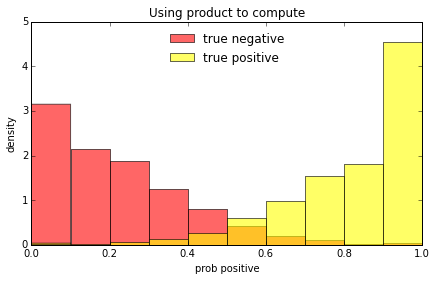

In [102]:
probs = {g: getprobs(testrev[g], docgrp, by='average') for g in docgrp }

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(7,4))
plt.hist(probs['neg']['pos'],normed=1,
    color="red", alpha=.6, label="true negative", linewidth=1)
plt.hist(probs['pos']['pos'],normed=1,
    color="yellow", alpha=.6, label="true positive", linewidth=1)
plt.xlim([0,1])
plt.ylim([0,5])
plt.legend(frameon=False, loc='upper center')
plt.xlabel("prob positive")
plt.ylabel("density")
plt.title('Using product to compute')

yhat = {g: probs[g].idxmax('columns') for g in docgrp}
mc = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp},
    'n': {g: len(testrev[g]) for g in docgrp}
    })
print(mc)

overall = mc.product("columns").sum()/mc['n'].sum()
print("\nOverall MCR: %.3f" %overall)

          mcr     n
neg  0.063700  4427
pos  0.058088  8797

Overall MCR: 0.060


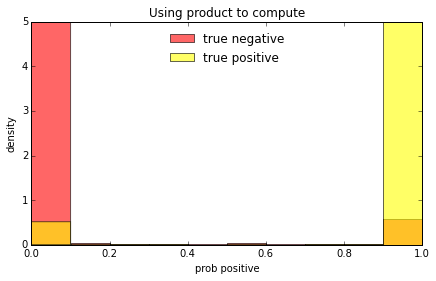

In [105]:
probs = {g: getprobs(testrev[g], docgrp, by='product') for g in docgrp }

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(7,4))
plt.hist(probs['neg']['pos'],normed=1,
    color="red", alpha=.6, label="true negative", linewidth=1)
plt.hist(probs['pos']['pos'],normed=1,
    color="yellow", alpha=.6, label="true positive", linewidth=1)
plt.xlim([0,1])
plt.ylim([0,5])
plt.legend(frameon=False, loc='upper center')
plt.xlabel("prob positive")
plt.ylabel("density")
plt.title('Using product to compute')

yhat = {g: probs[g].idxmax('columns') for g in docgrp}
mc = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp},
    'n': {g: len(testrev[g]) for g in docgrp}
    })
print(mc)

overall = mc.product("columns").sum()/mc['n'].sum()
print("\nOverall MCR: %.3f" %overall)

In [106]:
svec = np.concatenate((probs['neg']['pos'],probs['pos']['pos']), axis=0)
allrev = [[w for s in r for w in s] for r in np.concatenate((testrev['neg'],testrev['pos']))]

In [107]:
import pandas as pd
diff = pd.Series( svec )
tops = diff.order(ascending=False)[:5]
print("TOPS\n")
for i in tops.index:
    print " ".join(allrev[i])
    print
bots = diff.order()[:5]
print("BOTTOMS\n")
for i in bots.index:
    print " ".join(allrev[i])
    print


TOPS

love this place ! i recently did search local prenatal yoga classes found gilbert yoga online their excellent yelp reviews made me even more encouraged try them out im so glad i did ! prenatal class with lisette phenomenal i feel so good afterwards both inside out its not intimidating overwhelming some yoga studios might feel they welcome everyone new experienced really focus on your overall happiness experience classes donationbased so you contribute whatever amount of cash you can afford / feel comfortable with what great concept ! i would highly highly recommend gilbert yoga !

oh burger heaven how can i ever repay you ? i love my burgers .... what can i say ?? i am impressed ... burger ... poblano buger .... man oh man that burger has right amount of kick burger itself melts in your mouth ... just typing this review makes me want drive over there get one but they have huge selection of burgers you can try option make your own burger get pretzel bun you wont be disappointed fr

### classification by log product probability-- task c

In [126]:
docgrp_fine = {str(i) : i for i in range(1,6)} 
docgrp_fine

{'1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [121]:
model = {}
for g in docgrp_fine:
    print g, ":"
    reviews[g] = preprocessed_train_df[preprocessed_train_df['stars']==docgrp_fine[g]].txt
    model[g] = deepcopy(jointmodel)
    trainW2V( g )

1 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.
3 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.
2 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.
5 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.
4 :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.


In [127]:
## by average
for g in docgrp_fine:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars']==docgrp_fine[g]].txt.values
    probs[g] = getprobs(testrev[g], docgrp_fine)
    yhat[g] = probs[g].idxmax("columns")

mc_fine = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_fine},
    'n': {g: len(testrev[g]) for g in docgrp_fine}
    })
print(mc_fine)

ntest = mc_fine['n'].sum()
overall_fine = mc_fine.product("columns").sum()/ntest
print("\nOverall Fine-Scale MCR: %.3f" %overall_fine)

        mcr     n
1  0.246639  2380
2  0.649243  2047
3  0.626887  2849
4  0.555862  6883
5  0.288848  8797

Overall Fine-Scale MCR: 0.439


In [128]:
## by product
for g in docgrp_fine:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars']==docgrp_fine[g]].txt.values
    probs[g] = getprobs(testrev[g], docgrp_fine, by='product')
    yhat[g] = probs[g].idxmax("columns")

mc_fine = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_fine},
    'n': {g: len(testrev[g]) for g in docgrp_fine}
    })
print(mc_fine)

ntest = mc_fine['n'].sum()
overall_fine = mc_fine.product("columns").sum()/ntest
print("\nOverall Fine-Scale MCR: %.3f" %overall_fine)

        mcr     n
1  0.292017  2380
2  0.600879  2047
3  0.586522  2849
4  0.465495  6883
5  0.336024  8797

Overall Fine-Scale MCR: 0.425


## Task a

In [136]:
docgrp_a = {}
docgrp_a['neg'] = [1,2]
docgrp_a['pos'] = [3,4,5]
docgrp_a

{'neg': [1, 2], 'pos': [3, 4, 5]}

In [133]:
model = {}
for g in docgrp_a:
    print g, ":"
    reviews[g] = preprocessed_train_df[preprocessed_train_df['stars'].isin(docgrp_a[g])].txt
    model[g] = deepcopy(jointmodel)
    trainW2V( g )

neg :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.
pos :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.


In [138]:
## results by average
for g in docgrp_a:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars'].isin(docgrp_a[g])].txt.values
    probs[g] = getprobs(testrev[g], docgrp_a)
    yhat[g] = probs[g].idxmax("columns")

mc_a = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_a},
    'n': {g: len(testrev[g]) for g in docgrp_a}
    })
print(mc_a)

ntest = mc_a['n'].sum()
overall_a = mc_a.product("columns").sum()/ntest
print("\nOverall Task A MCR: %.3f" %overall_a)

          mcr      n
neg  0.165575   4427
pos  0.096659  18529

Overall Task A MCR: 0.110


In [139]:
## results by product
for g in docgrp_a:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars'].isin(docgrp_a[g])].txt.values
    probs[g] = getprobs(testrev[g], docgrp_a, by='product')
    yhat[g] = probs[g].idxmax("columns")

mc_a = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_a},
    'n': {g: len(testrev[g]) for g in docgrp_a}
    })
print(mc_a)

ntest = mc_a['n'].sum()
overall_a = mc_a.product("columns").sum()/ntest
print("\nOverall Task A MCR: %.3f" %overall_a)

          mcr      n
neg  0.162187   4427
pos  0.102326  18529

Overall Task A MCR: 0.114


# Task b

In [140]:
docgrp_b = {}
docgrp_b['neg'] = [1,2]
docgrp_b['neu'] = [3]
docgrp_b['pos'] = [4,5]
docgrp_b

{'neg': [1, 2], 'neu': [3], 'pos': [4, 5]}

In [141]:
model = {}
for g in docgrp_b:
    print g, ":"
    reviews[g] = preprocessed_train_df[preprocessed_train_df['stars'].isin(docgrp_b[g])].txt
    model[g] = deepcopy(jointmodel)
    trainW2V( g )

neg :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.
neu :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.
pos :
0

  
1

  
2

  
3

  
4

  
5

  
6

  
7

  
8

  
9

  
10

  
11

  
12

  
13

  
14

  
15

  
16

  
17

  
18

  
19

  
.


In [145]:
## by average
for g in docgrp_b:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars'].isin(docgrp_b[g])].txt.values
    probs[g] = getprobs(testrev[g], docgrp_b)
    yhat[g] = probs[g].idxmax("columns")

mc_b = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_b},
    'n': {g: len(testrev[g]) for g in docgrp_b}
    })
print(mc_b)

ntest = mc_b['n'].sum()
overall_b = mc_b.product("columns").sum()/ntest
print("\nOverall Taks b MCR: %.3f" %overall_b)

          mcr      n
neg  0.219562   4427
neu  0.547210   2849
pos  0.153635  15680

Overall Taks b MCR: 0.215


In [144]:
# by product
for g in docgrp_b:
    testrev[g] =  preprocessed_test_df[preprocessed_test_df['stars'].isin(docgrp_b[g])].txt.values
    probs[g] = getprobs(testrev[g], docgrp_b,by='product')
    yhat[g] = probs[g].idxmax("columns")

mc_b = pd.DataFrame({
    'mcr': {g: (yhat[g] != g).mean() for g in docgrp_b},
    'n': {g: len(testrev[g]) for g in docgrp_b}
    })
print(mc_b)

ntest = mc_b['n'].sum()
overall_b = mc_b.product("columns").sum()/ntest
print("\nOverall Taks b MCR: %.3f" %overall_b)

          mcr      n
neg  0.232437   4427
neu  0.509302   2849
pos  0.163265  15680

Overall Taks b MCR: 0.220
